In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Project/Dataset.csv")

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
# checking the no of row and columns

a = df.shape
print(f"There are {a[0]} rows and {a[1]} coulmns in our dataset ")

There are 150000 rows and 21 coulmns in our dataset 


In [ ]:
# list all the columns

list(df.columns)

['Date',
 'Time',
 'Booking ID',
 'Booking Status',
 'Customer ID',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Reason for cancelling by Customer',
 'Cancelled Rides by Driver',
 'Driver Cancellation Reason',
 'Incomplete Rides',
 'Incomplete Rides Reason',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating',
 'Payment Method']

In [ ]:
# checking data type of all Columns

df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


# 1. Data Cleaning & Preprocessing

**1.1 Converting the date/time column into appropriate format**

In [ ]:
# Converting date to datetime

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Project/Dataset.csv" , parse_dates=[['Date', 'Time']], keep_date_col=True)

In [ ]:
df['Hour'] = df['Date_Time'].dt.hour
df['DayOfWeek'] = df['Date_Time'].dt.day_name()

**1.2 Standardize categorical text columns**

In [ ]:
Std_col = ["Booking Status", "Vehicle Type", "Payment Method",
                  "Reason for cancelling by Customer", "Driver Cancellation Reason",
                  "Incomplete Rides Reason", "Pickup Location", "Drop Location"]
for c in Std_col:
    if c in df.columns:
        df[c] = df[c].astype(str).str.lower().str.strip().replace({"nan": np.nan})


In [ ]:
# checking null values

df.isnull().sum()

,0
Date_Time,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500


In [ ]:
df.nunique()

,0
Date_Time,149532
Date,365
Time,62910
Booking ID,148767
Booking Status,5
Customer ID,148788
Vehicle Type,7
Pickup Location,176
Drop Location,176
Avg VTAT,181


In [ ]:
df.describe(include='all')

,Date_Time,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Hour,DayOfWeek
count,150000,150000,150000,150000,150000,150000,150000,150000,150000,139500.000000,...,27000,9000.0,9000,102000.000000,102000.000000,93000.000000,93000.000000,102000,150000.000000,150000
unique,NaN,365,62910,148767,5,148788,7,176,176,NaN,...,4,NaN,3,NaN,NaN,NaN,NaN,5,NaN,7
top,NaN,2024-11-16,17:44:57,"""CNR6337479""",completed,"""CID6715450""",auto,khandsa,ashram,NaN,...,customer related issue,NaN,customer demand,NaN,NaN,NaN,NaN,upi,NaN,Monday
freq,NaN,462,16,3,93000,3,37419,949,936,NaN,...,6837,NaN,3040,NaN,NaN,NaN,NaN,45909,NaN,21644
mean,2024-07-01 07:14:41.251033344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,...,NaN,1.0,NaN,508.295912,24.637012,4.230992,4.404584,NaN,14.034113,NaN
min,2024-01-01 00:19:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,1.0,NaN,50.000000,1.000000,3.000000,3.000000,NaN,0.000000,NaN
25%,2024-03-31 22:55:36.249999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,...,NaN,1.0,NaN,234.000000,12.460000,4.100000,4.200000,NaN,10.000000,NaN
50%,2024-07-01 09:24:52.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,...,NaN,1.0,NaN,414.000000,23.720000,4.300000,4.500000,NaN,15.000000,NaN
75%,2024-09-30 13:46:07.249999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.300000,...,NaN,1.0,NaN,689.000000,36.820000,4.600000,4.800000,NaN,18.000000,NaN
max,2024-12-30 23:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,...,NaN,1.0,NaN,4277.000000,50.000000,5.000000,5.000000,NaN,23.000000,NaN


**1.3 Handling missing or inconsistent data**

In [ ]:
df.columns

Index(['Date_Time', 'Date', 'Time', 'Booking ID', 'Booking Status',
       'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Hour',
       'DayOfWeek'],
      dtype='object')

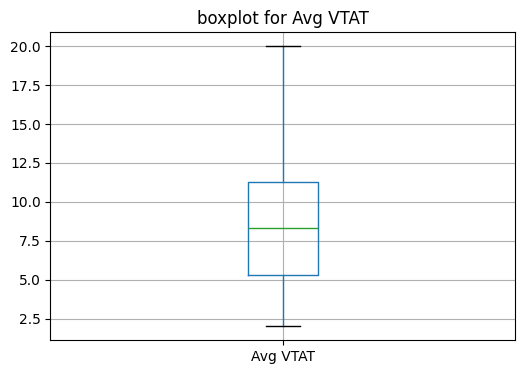

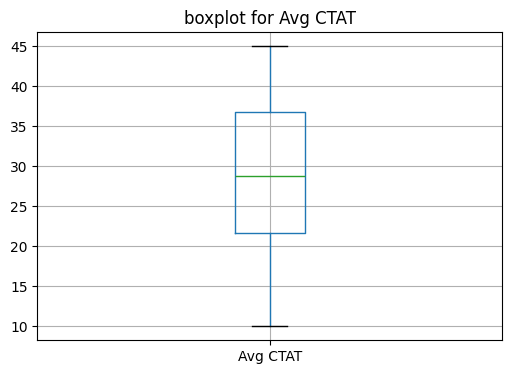

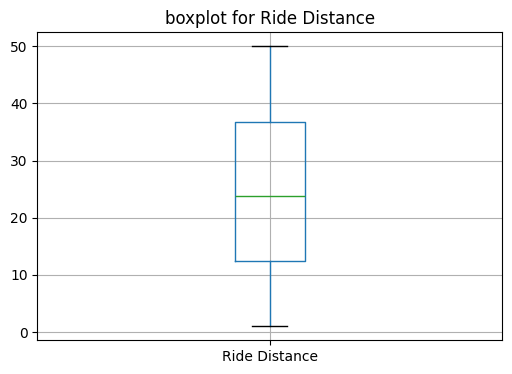

In [ ]:
# Columns have not Outlier

col_Without_outlier = ['Avg VTAT', 'Avg CTAT', 'Ride Distance']

for col in col_Without_outlier:
  plt.figure(figsize=(6,4))
  df.boxplot(column=col)
  plt.title(f'boxplot for {col}')

**Fill the numerical columns having no outliers with mean.**

In [ ]:
for col in col_Without_outlier:
  df[col] = df[col].fillna(df[col].mean())

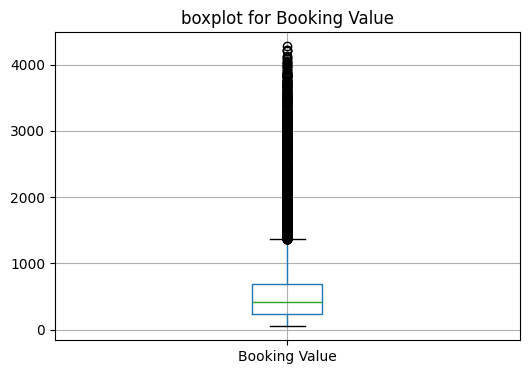

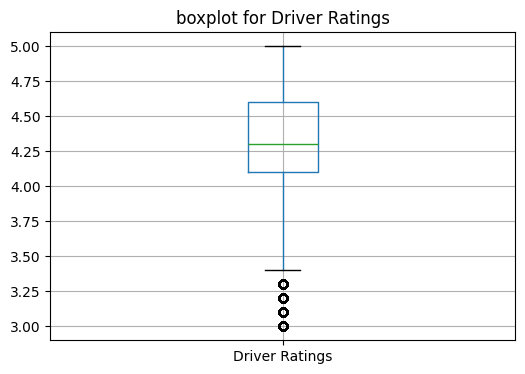

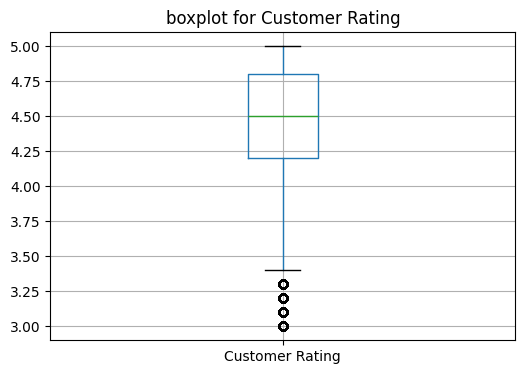

In [ ]:
# Columns having outliers

col_with_outlier = ['Booking Value', 'Driver Ratings','Customer Rating']

for col in col_with_outlier:
  plt.figure(figsize=(6,4))
  df.boxplot(column=col)
  plt.title(f'boxplot for {col}')

**Fill the numerical columns having outliers with median**

In [ ]:
for col in col_with_outlier:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df['Cancelled Rides by Driver'].value_counts()

,count
Cancelled Rides by Driver,
1.0,27000


**Fill the categorical column**

In [ ]:
reason_cols = ["Reason for cancelling by Customer", "Driver Cancellation Reason",
               "Incomplete Rides Reason", "Payment Method"]
for col in reason_cols:
    df[col] = df[col].fillna("NA")

Other columns where having value 1 and Null convert the null into 0.

In [ ]:
flag_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
for col in flag_cols:
  df[col] =df[col].fillna(0).astype(int)

In [ ]:
df.isnull().sum()

,0
Date_Time,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0


In [ ]:
# check for Duplicates values

df.duplicated().sum()

np.int64(0)

In [ ]:
# remove Duplicates values

df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.shape

(150000, 24)

In [ ]:
#saved the clean data.

# df.to_csv("/content/drive/MyDrive/Colab Notebooks/Python Project/Clean Project data.csv", index=False)

# 2. Descriptive Analysis

**2.1 What are the most and least popular vehicle types**

In [ ]:
veh_count = df["Vehicle Type"].value_counts()

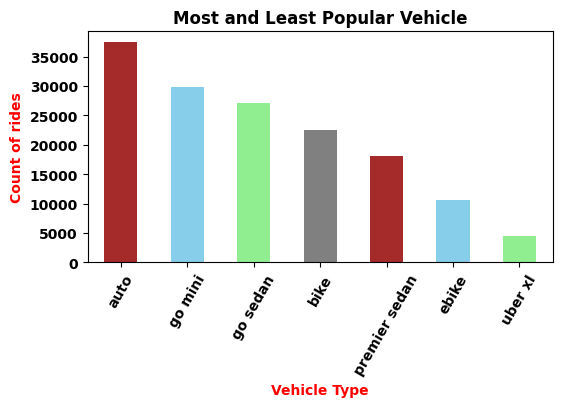

In [ ]:
plt.figure(figsize=(6,3))
veh_count.plot(kind='bar', color=['Brown', 'Skyblue', "LightGreen", "grey"])
plt.title("Most and Least Popular Vehicle", fontweight="bold")
plt.ylabel("Count of rides", color="Red",fontweight="bold")
plt.xlabel("Vehicle Type", color="Red",fontweight="bold")
plt.xticks(rotation=60, fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()



**2.2 What is the average ride distance and booking value?**

In [ ]:
Avg_distance = df["Ride Distance"].mean()
Avg_price = df["Booking Value"].mean()

print(f"The Average distance : {round(Avg_distance, 2)} KM")
print(f"The Average Price : {round(Avg_price, 2)} Rs")

The Average distance : 24.64 KM
The Average Price : 478.12 Rs


**2.3 Distribution of ratings (drivers and customers)**

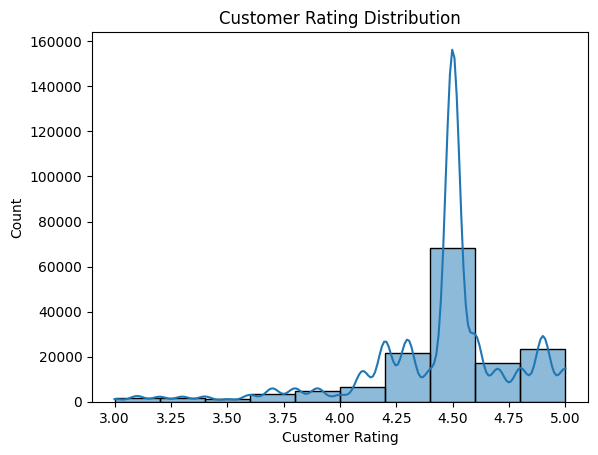

In [ ]:
sns.histplot(df['Customer Rating'], kde=True, bins=10)
plt.title("Customer Rating Distribution")
plt.show()

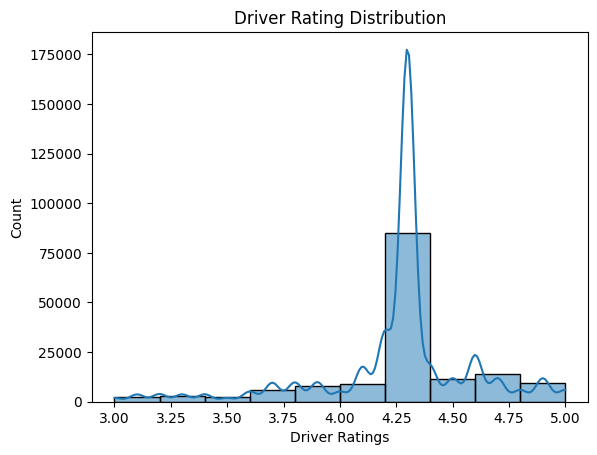

In [ ]:
sns.histplot(df['Driver Ratings'], kde=True, bins=10)
plt.title("Driver Rating Distribution")
plt.show()

In [ ]:
df.columns

Index(['Date_Time', 'Date', 'Time', 'Booking ID', 'Booking Status',
       'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Hour',
       'DayOfWeek'],
      dtype='object')

**2.4 Most common cancellation reasons by customers and drivers.**

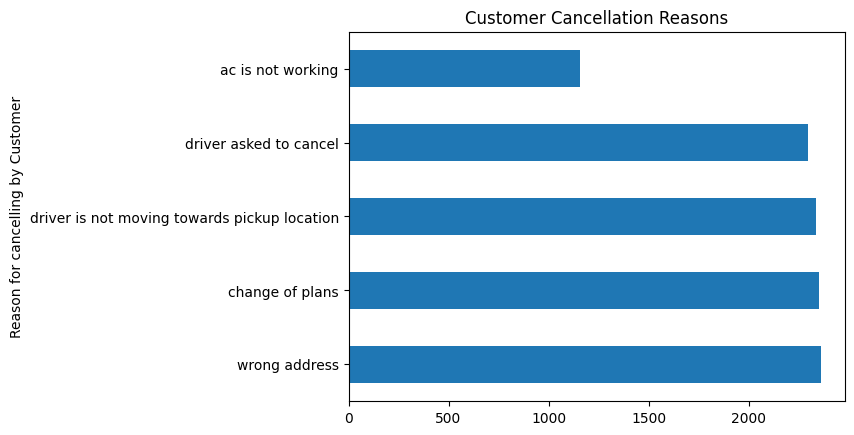

Reason for cancelling by Customer
wrong address                                   2362
change of plans                                 2353
driver is not moving towards pickup location    2335
driver asked to cancel                          2295
ac is not working                               1155
Name: count, dtype: int64



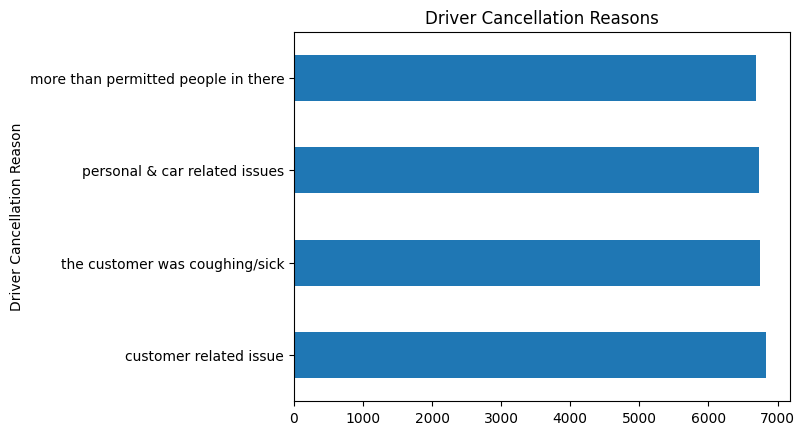

Driver Cancellation Reason
customer related issue                 6837
the customer was coughing/sick         6751
personal & car related issues          6726
more than permitted people in there    6686
Name: count, dtype: int64


In [ ]:
# Remove real NaN and string "NA"
cancel_customer = df['Reason for cancelling by Customer']
cancel_customer = cancel_customer[~cancel_customer.isin(["NA"])].dropna().value_counts()

cancel_driver = df['Driver Cancellation Reason']
cancel_driver = cancel_driver[~cancel_driver.isin(["NA"])].dropna().value_counts()

# Plot
cancel_customer.plot(kind='barh', title="Customer Cancellation Reasons")
plt.show()
print(f"{cancel_customer}\n")

cancel_driver.plot(kind='barh', title="Driver Cancellation Reasons")
plt.show()
print(cancel_driver)


# 3. Customer Behaviour Insights

**3.1 Who are the frequent cancellers (by customer ID)**


In [ ]:
df['Booking Status'] = df['Booking Status'].str.strip().str.lower()

Freq_Cancel = (df[df['Booking Status'] == "cancelled by customer"]['Customer ID'].value_counts().head())

print(Freq_Cancel)

Customer ID
"CID2358909"    2
"CID5251785"    2
"CID5505307"    2
"CID8519067"    2
"CID7939117"    2
Name: count, dtype: int64


**3.2 Is there a pattern in cancellations by time of day or day of week**

In [ ]:
# Normalize booking status
df['Booking Status'] = df['Booking Status'].str.strip().str.lower()


In [ ]:
# Ensure Date and Time are datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# If Time is string like '12:30:00', convert it:
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Day of week (Monday, Tuesday, etc.)
df['DayOfWeek'] = df['Date'].dt.day_name()


In [ ]:
cancelled = df[df['Booking Status'].str.contains("cancelled")]


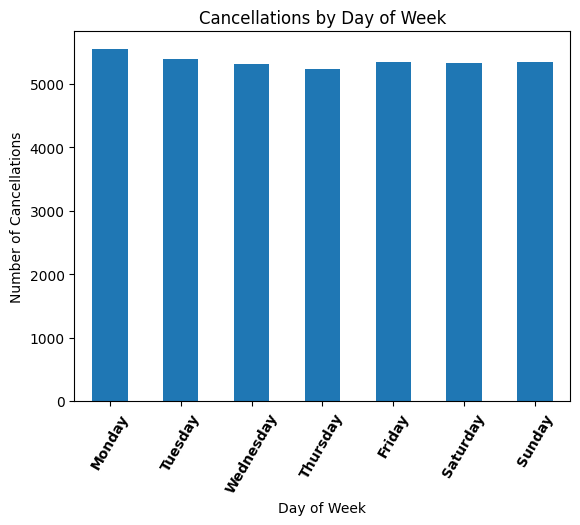

In [ ]:
cancellations_by_day = cancelled['DayOfWeek'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

cancellations_by_day.plot(kind='bar', title="Cancellations by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=60, fontweight="bold")
plt.show()


#### Most Cancellation done in Evening between 6 - 7 PM and In morning at 10 AM most cancellation done.

<Axes: xlabel='Hour'>

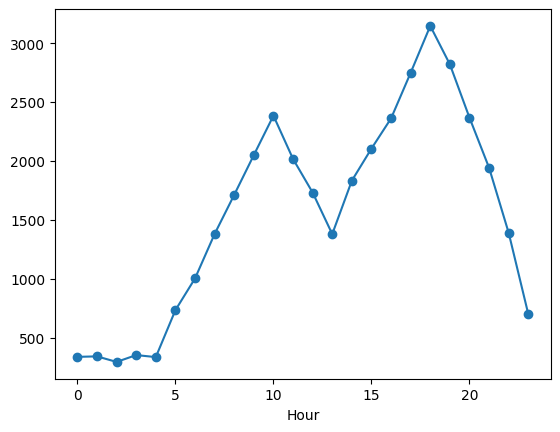

In [ ]:
cancelled = df[df['Booking Status'].str.contains("cancelled")]
cancellations_by_hour = cancelled['Hour'].value_counts().sort_index()
cancellations_by_hour.plot(kind='line', marker='o')


**3.3 Correlation between ride value, distance, satisfaction**

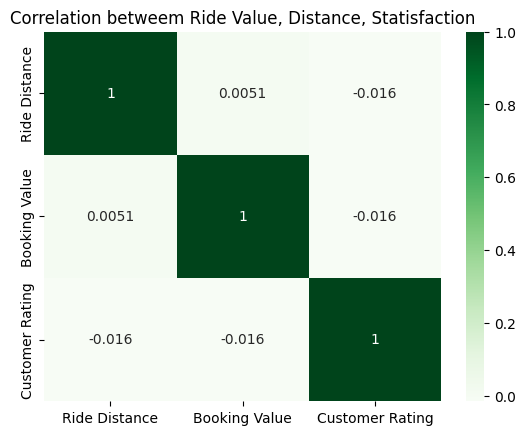

In [ ]:
corr = df[['Ride Distance','Booking Value','Customer Rating']].corr()
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlation betweem Ride Value, Distance, Statisfaction")
plt.show()

### As we can see from above correaltion map, there is no correaltions between all the variable. All 3 are independent.

# 4. Driver Performance Evaluation


**4.1 Which drivers have the highest/lowest ratings?**

In [ ]:
# 1. Drivers with highest/lowest ratings
"""
As we don't have any another columns which having driver information,
so we can't calculate that which driver having highest/lowest rating.
"""

"\nAs we don't have any another columns which having driver information,\nso we can't calculate that which driver having highest/lowest rating.\n"

**4.2 How many rides are being cancelled by drivers and why?**

The total rides Cancelled by driver is: 27000



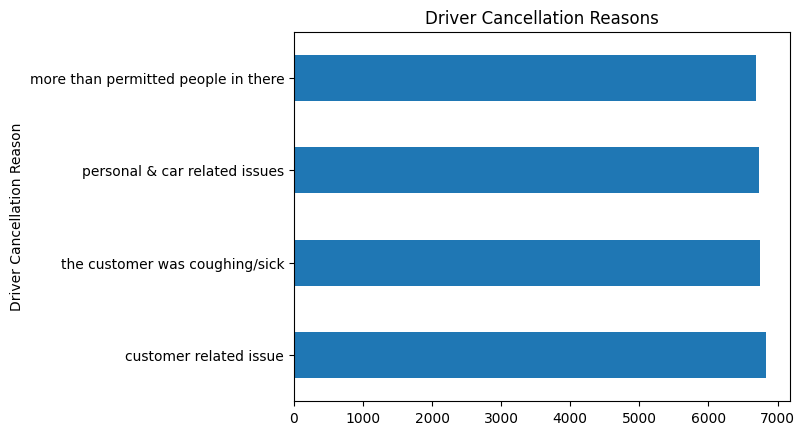

In [ ]:
driver_cancel = df["Cancelled Rides by Driver"].sum()

print(f"The total rides Cancelled by driver is: {driver_cancel}\n")

cancel_driver = df['Driver Cancellation Reason']
cancel_driver = cancel_driver[~cancel_driver.isin(["NA"])].dropna().value_counts()

cancel_driver.plot(kind='barh', title="Driver Cancellation Reasons")
plt.show()

# 5 Operational Metrics


**5.1 Average VTAT and CTAT across vehicle types and locations**

In [ ]:
Avg_TAT = df.groupby(['Vehicle Type', 'Pickup Location'])[['Avg VTAT', 'Avg CTAT']].mean()

print(Avg_TAT)

                              Avg VTAT   Avg CTAT
Vehicle Type Pickup Location                     
auto         adarsh nagar     8.560007  28.422589
             aiims            8.244662  29.193045
             akshardham       8.541663  28.706369
             ambience mall    8.627357  29.321537
             anand vihar      8.297954  29.789210
...                                ...        ...
uber xl      vidhan sabha     7.766775  29.397612
             vinobapuri       8.597575  32.119303
             vishwavidyalaya  8.893415  28.789071
             welcome          9.768374  30.336275
             yamuna bank      9.922291  29.252016

[1232 rows x 2 columns]


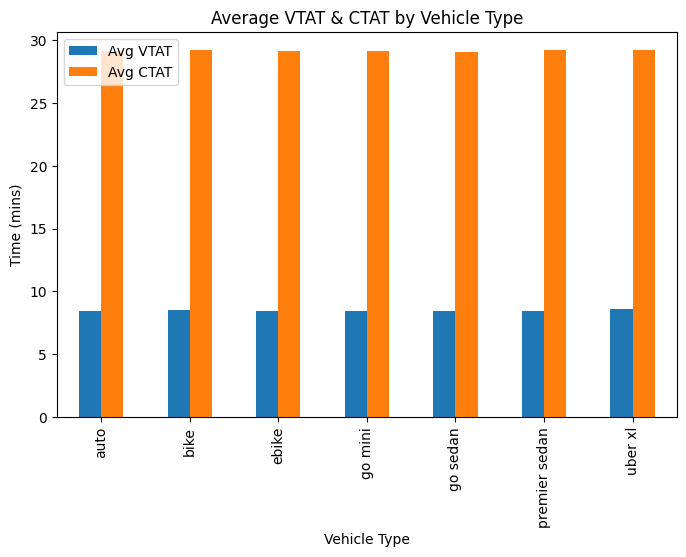

In [ ]:
df.groupby('Vehicle Type')[['Avg VTAT', 'Avg CTAT']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Average VTAT & CTAT by Vehicle Type")
plt.ylabel("Time (mins)")
plt.show()

**5.2 Identify Peak Demand and Locations and time slots**

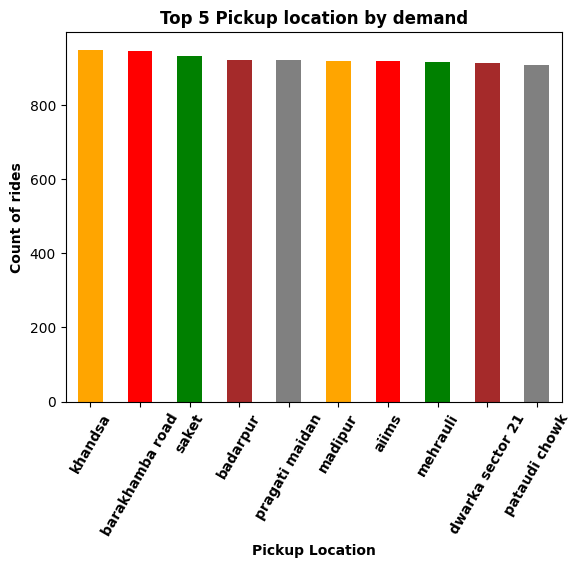

In [ ]:
# Peak Location

location_demand = df['Pickup Location'].value_counts().head(10)
location_demand.plot(kind = 'bar', color = ['Orange', 'Red', 'Green', 'Brown', 'Grey'])
plt.title('Top 5 Pickup location by demand', fontweight='bold')
plt.ylabel("Count of rides", fontweight="bold")
plt.xlabel("Pickup Location", fontweight="bold")
plt.xticks(rotation=60, fontweight="bold")
plt.show()

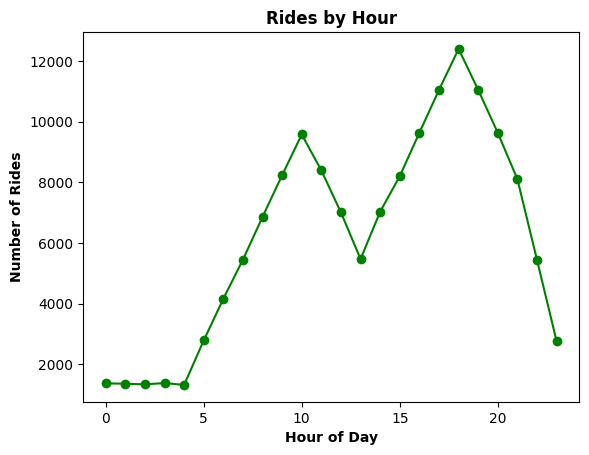

In [ ]:
# Peak Time

demand_time = df['Hour'].value_counts().sort_index()
demand_time.plot(kind='line', marker='o', color='green')
plt.title("Rides by Hour", fontweight='bold')
plt.xlabel("Hour of Day", fontweight='bold')
plt.ylabel("Number of Rides", fontweight='bold')
plt.show()

**5.3 Analyze booking statuses over time.**

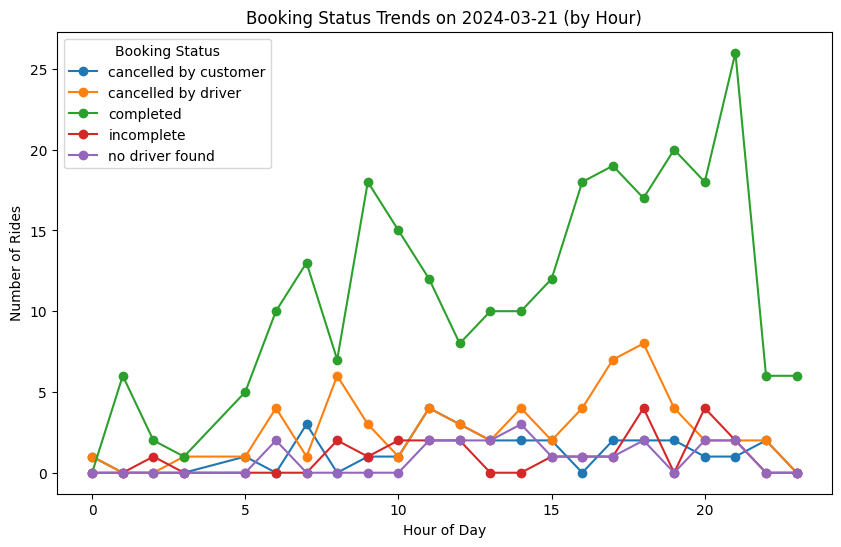

In [ ]:
# Booking status trend daily
selected_date = "2024-03-21"   # change to a date present in your dataset

one_day_data = df[df['Date_Time'].dt.date == pd.to_datetime(selected_date).date()]

status_one_day = one_day_data.groupby([one_day_data['Date_Time'].dt.hour, 'Booking Status']).size().unstack().fillna(0)

status_one_day.plot(kind='line', marker='o', figsize=(10,6), title=f"Booking Status Trends on {selected_date} (by Hour)")
plt.ylabel("Number of Rides")
plt.xlabel("Hour of Day")
plt.show()
